# PCA-LDA

Given a collection of of n m-dimensional samples stored in the columns of matrix $X = [x_1 , . . . , x_n ]$. We also assume that data are centered. Otherwise, we can always substract the mean $m = \frac{1}{n} \sum_{i=1}^{n}x_i$.

An efficient way of doing this is:

\begin{align*}
X − M = X \left(I − \frac{1}{n}1_n1_n^T \right)
\end{align*}

## Statistical perspective
We want to find the vector $w$ such that the variance of the projected features $y_i = w_i^Tx_i$ is maximised.The variance can be expressed:

\begin{align*}
\sigma_y^2 = \frac{1}{n} \sum_{i=1}^{n}(y_i - \mu_y)
\end{align*}

Where $\mu_y$ is the mean. Since we supposed the data are centered, $\mu_y = 0$.

The maximiser is:

\begin{align*}
w^* & = \mathrm{argmax}_{w} \frac{1}{2n} \sum_{i=1}^{n}(w^Tx_i)^2 = \mathrm{argmax}_{w}  \frac{1}{2n} \sum_{i=1}^{n}w^Tx_i x_i^Tw\\
& = \mathrm{argmax}_{w} \frac{1}{2} w^T\frac{XX^T}{n}w  = \mathrm{argmax}_{w} \frac{1}{2} w^T S_tw  
\end{align*}

Where $S_t = \frac{XX^T}{n}$ is called the covariance matrix (or total-scatter matrix). We add the following constraint not to end up with a trivial solution $w=\infty$.

\begin{align*}
w^*  &= \mathrm{argmax}_{w} \frac{1}{2} w^T S_tw \\
\text{subject to } &w^Tw=1
\end{align*}

The corresponding Lagrangian is:

\begin{align*}
L(w, \lambda) = \frac{1}{2}w^TS_tw - \lambda(w^Tw-1)
\end{align*}

Taking the derivative:
\begin{align*}
\frac{ \partial L}{\partial w} = S_tw - \lambda w = 0
\end{align*}

This means $w$ is an eigenvector of $S_t$, and $\lambda$ the corresponding eigenvalue. Plugging back this expression in the initial problem:

\begin{align*}
\lambda^* = \mathrm{argmax}_{\lambda} \lambda
\end{align*}

So the largest eigenvalue is chosen.

This reasonning can be applied for $y_i \in \mathbb{R}^d$:

\begin{align*}
W^* =& \mathrm{argmax}_{W} \frac{1}{2n} \sum_{k=1}^{d} \sum_{i=1}^{n} y_{ki}^2  = \mathrm{argmax}_{W} \frac{1}{2n} \sum_{k=1}^{d} \sum_{i=1}^{n} (w_k^Tx_i)^2 \\
& = \mathrm{argmax}_{W} \frac{1}{2n} \sum_{k=1}^{d} \sum_{i=1}^{n} w_k^Tx_ix_i^Tw_k \\
& = \mathrm{argmax}_{W} \frac{1}{2n} \sum_{k=1}^{d}  w_k^T \left(\sum_{i=1}^{n}x_ix_i^T \right)w_k \\
& = \mathrm{argmax}_{W} \frac{1}{2} \sum_{k=1}^{d}  w_k^T S_t w_k \\
& = \mathrm{argmax}_{W} \frac{1}{2} \mathrm{Tr} (W^T S_t W) \\
\end{align*}

So the general problem is:

\begin{align*}
\max_W \mathrm{Tr} (W^T S_tW) \\
\text{subject to } &W^TW=1
\end{align*}

Taking the partial derivative of the Lagrangian leads to a similar condition:

\begin{align*}
S_tW=W\Lambda
\end{align*}

Where $\Lambda$ is the matrix of the Lagrange multipliers.

Assuming the eigendecomposition of $S_t$ is $S_t = U \Lambda U^T$, then $W = U_d = [u_1, ..., u_d]$.

Similarly as above, the cost function can be written as:

\begin{align*}
    \mathrm{Tr}(W^TS_TW) = \mathrm{Tr}(W^T U \Lambda U^T W) = \mathrm{Tr}(\Lambda_d) = \sum_{k=1}^{d} \lambda_k
\end{align*}

Since $\lambda_k \ge 0$, maximisation of the above is equivalent to take the $d$ largest eigenvalues.

# PIE facial database

In [1]:
# http://www.cad.zju.edu.cn/home/dengcai/Data/FaceData.html
# https://github.com/jindongwang/transferlearning/blob/master/data/dataset.md
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

In [2]:
fea = pd.read_csv("fea64.csv", header=None) 
gnd = pd.read_csv("gnd64.csv", header=None) 

In [3]:
print('fea:', fea.shape) # each row is a 64x64 image (11554 examples)
print('gnd:', gnd.shape) # label: 68 classes corresponding to the 68 subjects (11554 examples) 

fea: (11554, 4096)
gnd: (11554, 1)


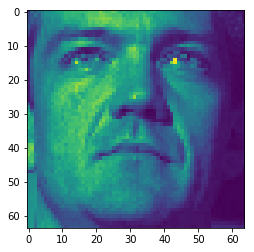

In [4]:
ind = np.random.randint(fea.shape[0])
img = fea.values[ind,:].reshape(64,64).T
imgplot = plt.imshow(img)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(fea, gnd, test_size=0.95)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(577, 4096) (577, 1)
(10977, 4096) (10977, 1)


In [6]:
def PCA_py(data, dim):
    data = data.values
    
    n, m = data.shape
    
    mean = 1/n*np.sum(data, axis = 0)
    data = data - mean
    
    #data = data.T @ (np.eye(n) - 1/n*np.ones((n, 1)) @ np.ones((1, n)))
    
    St = data @ data.T
    
    w, v = np.linalg.eig(St)
    
    idx = w.argsort()[::-1]   
    w = w[idx]
    w = np.diag(w)
    v = v[:,idx]
    
    w_inv = np.linalg.inv(w)
    w_inv[w_inv <0] = 0
    
    u = data.T @ v @ w_inv**0.5
    
    np.nan_to_num(u)
    
    u_red = u[:,:dim]
    
    y = data @ u_red
    
    np.nan_to_num(y)
    
    data_reconstruct = y @ u_red.T + mean
    
    return u_red, y, data_reconstruct

# Plot in 2D

In [7]:
pca = PCA(n_components=2)
pca_sk = pca.fit_transform(StandardScaler().fit_transform(X_train.astype(float)))

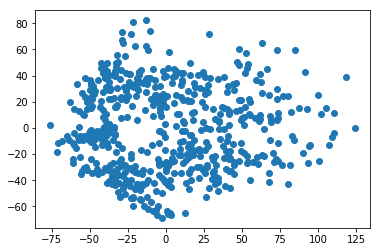

In [8]:
plt.scatter(pca_sk[:,0], pca_sk[:,1])

In [9]:
u_red, pca_py, data_re = PCA_py(X_train, 2)

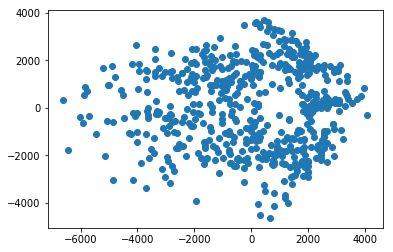

In [10]:
plt.scatter(pca_py[:,0], pca_py[:,1])

# Precision and reconstruction

In [11]:
def knn(X_train, X_test, y_train, y_test):
    mse_table = []
    precision_table = []
    for i in range(1,100):
        u_red, pca_py, data_re = PCA_py(X_train, i)
        mse = ((X_train.values - data_re)**2).mean()
        mse_table.append(mse)
        
        X_train_red = X_train @ u_red
        X_test_red = X_test @ u_red
        
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(X_train_red, y_train.values.ravel())
        y_pred = neigh.predict(X_test_red)
        precision = precision_score(y_test, y_pred, average='micro')
        precision_table.append(precision)
    
    return mse_table, precision_table

In [12]:
mse_table, precision_table = knn(X_train, X_test, y_train, y_test)

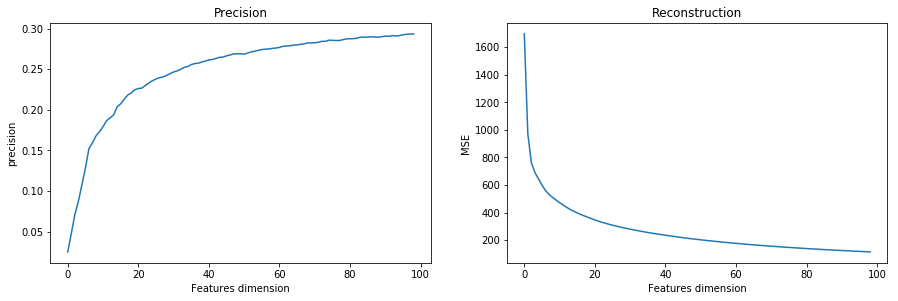

In [13]:
plt.figure(figsize=(15,15))

plt.subplot(321)
plt.plot(precision_table)
plt.xlabel('Features dimension')
plt.ylabel('precision')
plt.title('Precision')

plt.subplot(322)
plt.plot(mse_table)
plt.xlabel('Features dimension')
plt.ylabel('MSE')
plt.title('Reconstruction')

plt.show()